### High Rated Games on Google Playstore

Problem Statement:
    
-> Conduct an EDA on the Google Play Store data and try to explore whether given the data, ratings of an can be predicted

Why solve this project ?

-> After completing this project, you will have a better understanding of certain methods of EDA and Data Preprocessing.

##### Data Loading

In [ ]:
path

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

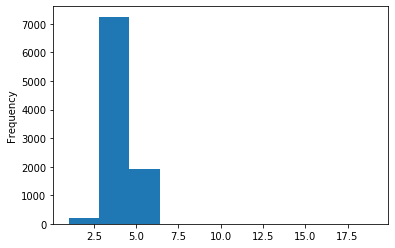

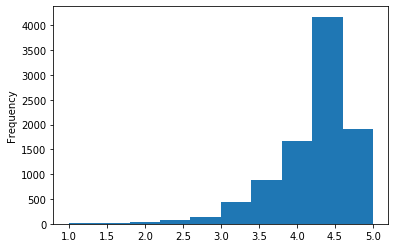

In [18]:
#Importing header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Code starts here

#Loading the data
data=pd.read_csv(path)
print(data.head())
#Plotting histogram of Rating
data['Rating'].plot(kind='hist')

plt.show()


#Subsetting the dataframe based on `Rating` column
data=data[data['Rating']<=5]

#Plotting histogram of Rating
data['Rating'].plot(kind='hist')   

#Code ends here

##### Null Value Treatment

In [19]:
#Code starts here

#Sum of null values of each column
total_null = data.isnull().sum()

#Percentage of null values of each column
percent_null = (total_null/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])

print(missing_data)
print()
#Dropping the null values
data.dropna(inplace = True)

#Sum of null values of each column
total_null_1 = data.isnull().sum()

#Percentage of null values of each column
percent_null_1 = (total_null_1/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data_1 = pd.concat([total_null_1, percent_null_1], axis=1, keys=['Total', 'Percent'])

print(missing_data_1)

#Code ends here

                Total   Percent
App                 0  0.000000
Category            0  0.000000
Rating              0  0.000000
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                0  0.000000
Price               0  0.000000
Content Rating      0  0.000000
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         4  0.000427
Android Ver         2  0.000214

                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0
Current Ver         0      0.0
Android Ver         0      0.0


##### Category vs Rating

Let's first check if category and ratings have any sort of relation

Text(0.5, 1, 'Rating vs Category [BoxPlot]')

<Figure size 720x720 with 0 Axes>

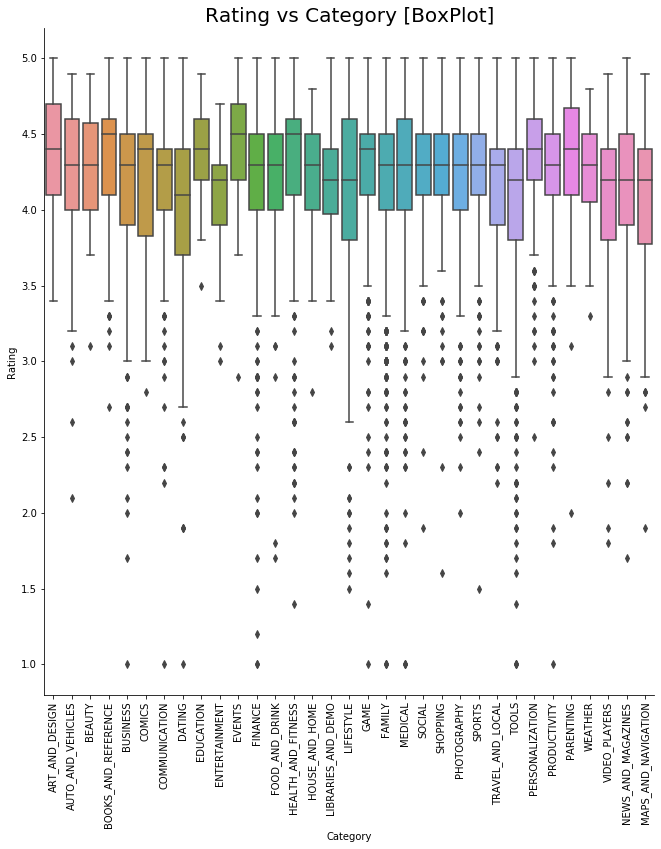

In [20]:
#Category vs Rating

#Code starts here

#Setting the figure size
plt.figure(figsize=(10,10))

#Plotting boxplot between Rating and Category
cat= sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10)

#Rotating the xlabel rotation
cat.set_xticklabels(rotation=90)

#Setting the title of the plot
plt.title('Rating vs Category [BoxPlot]',size = 20)

#Code ends here

##### Installs vs Ratings

Text(0.5, 1.0, 'Rating vs Installs[RegPlot]')

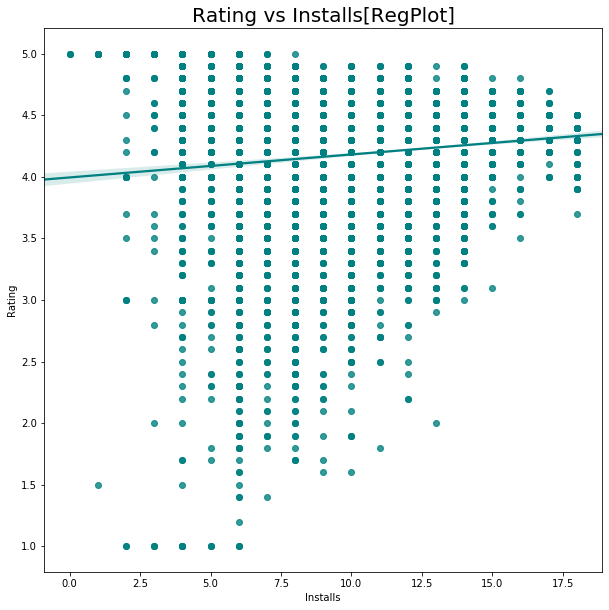

In [21]:
#Importing header files
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#Code starts here

#Removing `,` from the column
data['Installs']=data['Installs'].str.replace(',','')

#Removing `+` from the column
data['Installs']=data['Installs'].str.replace('+','')

#Converting the column to `int` datatype
data['Installs'] = data['Installs'].astype(int)

#Creating a label encoder object
le=LabelEncoder()

#Label encoding the column to reduce the effect of a large range of values
data['Installs']=le.fit_transform(data['Installs'])

#Setting figure size
plt.figure(figsize = (10,10))

#Plotting Regression plot between Rating and Installs
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data)

#Setting the title of the plot
plt.title('Rating vs Installs[RegPlot]',size = 20)

#Code ends here


##### Price vs Ratings

Text(0.5, 1.0, 'Rating vs Price[Reg Plot]')

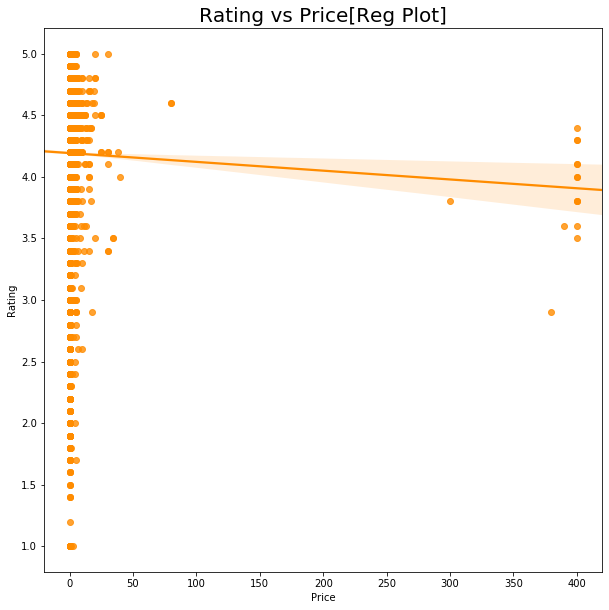

In [22]:
#Code starts here

#Removing the dollar sign from the column
data['Price'] = data['Price'].str.replace('$','')

#Converting the column to float
data['Price'] = data['Price'].astype(float)

#Setting the figure size
plt.figure(figsize = (10,10))

#Plotting Regression plot between Rating and Price
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data)

#Setting the plot title
plt.title('Rating vs Price[Reg Plot]',size = 20)

#Code ends here

##### Genre vs Rating

In [23]:

#Code starts here

#Finding the length of unique genres
print( len(data['Genres'].unique()) , "genres")
print()
#Splitting the column to include only the first genre of each app
data['Genres'] = data['Genres'].str.split(';').str[0]

#Grouping Genres and Rating
gr_mean=data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean()

print(gr_mean.describe())
print()
#Sorting the grouped dataframe by Rating
gr_mean=gr_mean.sort_values('Rating')

print(gr_mean.head(1))
print()
print(gr_mean.tail(1))

#Code ends here


115 genres

          Rating
count  48.000000
mean    4.212486
std     0.104071
min     3.970769
25%     4.132114
50%     4.204821
75%     4.286532
max     4.435556

    Genres    Rating
14  Dating  3.970769

    Genres    Rating
18  Events  4.435556


##### Last Updated vs Rating

Text(0.5, 1.0, 'Rating vs Last Updated [RegPlot]')

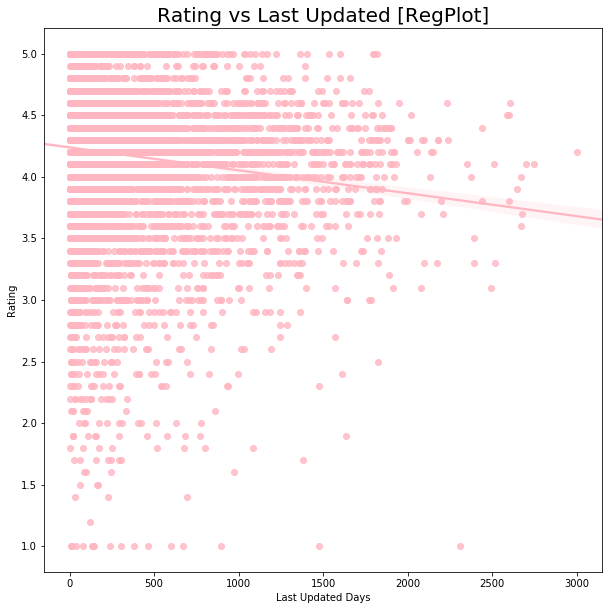

In [24]:

#Code starts here

#Converting the column into datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

#Creating new column having `Last Updated` in days
data['Last Updated Days'] = (data['Last Updated'].max()-data['Last Updated'] ).dt.days 

#Setting the size of the figure
plt.figure(figsize = (10,10))

#Plotting a regression plot between `Rating` and `Last Updated Days`
sns.regplot(x="Last Updated Days", y="Rating", color = 'lightpink',data=data )

#Setting the title of the plot
plt.title('Rating vs Last Updated [RegPlot]',size = 20)

#Code ends here